 <h1><center>
    Lab 3: Introduction to Data with SAS</center></h1>
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>


## Getting Started

In [1]:
filename cdc url 'http://www.openintro.org/stat/data/cdc.csv';
proc import datafile=cdc
out=work.cdc
dbms=csv
replace;
getnames=yes;
run;

proc contents data=work.cdc short;
run;

SAS Connection established. Subprocess id is 3796



Alphabetic List of Variables for WORK.CDC
age exerany gender genhlth height hlthplan smoke100 weight wtdesire


## Exercise 1

There are 20000 cases and 9 variables.<br>
Their data types are:<br>
age     : quantitative <br>
exerany : qualitative-dichotomous <br>
gender  : qualitative-dichotomous <br>
genhlth : qualitative-ordinal <br>
height  : quantitative <br>
hlthplan: qualitative-dichotomous <br>
smoke100: qualitative-dichotomous <br>
weight : quantitative <br>
wtdesire: quantitative <br>

In [2]:
proc print data=work.cdc (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,good,0,1,0,70,175,175,77,m
2,good,0,1,1,64,125,115,33,f
3,good,1,1,1,60,105,105,49,f
4,good,1,1,0,66,132,124,42,f
5,very good,0,1,0,61,150,130,55,f
6,very good,1,1,0,64,114,114,55,f
7,very good,1,1,0,71,194,185,31,m
8,very good,0,1,0,67,170,160,45,m
9,good,0,1,1,65,150,130,27,f
10,good,1,1,0,70,180,170,44,m


## Summaries and Tables

In [4]:
proc univariate data=work.cdc;
var weight;
run;

In [4]:
proc freq data=work.cdc;
tables weight;
run;

weight,Frequency,Percent,CumulativeFrequency,CumulativePercent
68,1,0.01,1,0.01
70,1,0.01,2,0.01
78,2,0.01,4,0.02
79,1,0.01,5,0.03
80,2,0.01,7,0.04
82,2,0.01,9,0.05
83,1,0.01,10,0.05
84,3,0.02,13,0.07
85,4,0.02,17,0.09
86,1,0.01,18,0.09


smoke100,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,10559,52.80,10559,52.80
1,9441,47.21,20000,100.00

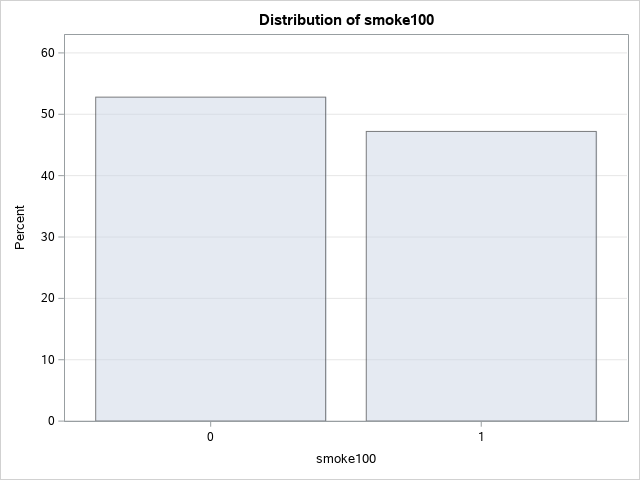

In [5]:
proc freq data=work.cdc;
tables smoke100 / plots=freqplot(scale=percent);
run;

## Exercise 2

The code below creates numerical summaries for height and age.
We are asked to find the interquartile range for each.

In [6]:
proc univariate data=work.cdc;
var height;
var age;
run;

The Interquartile range is 6 for "height" and 26 for "age".

We also computed the relative frequency distribution for gender and exerany.

gender,Frequency,Percent,CumulativeFrequency,CumulativePercent
f,10431,52.16,10431,52.16
m,9569,47.85,20000,100.00
exerany,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,5086,25.43,5086,25.43
1,14914,74.57,20000,100.00
genhlth,Frequency,Percent,CumulativeFrequency,CumulativePercent
excellent,4657,23.29,4657,23.29
fair,2019,10.10,6676,33.38
good,5675,28.38,12351,61.76
poor,677,3.39,13028,65.14

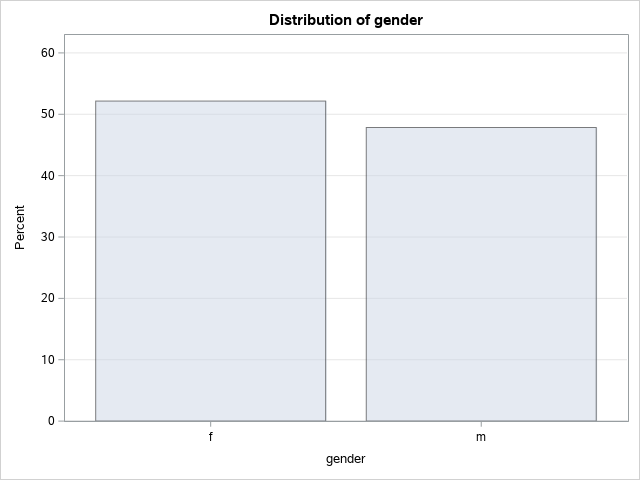
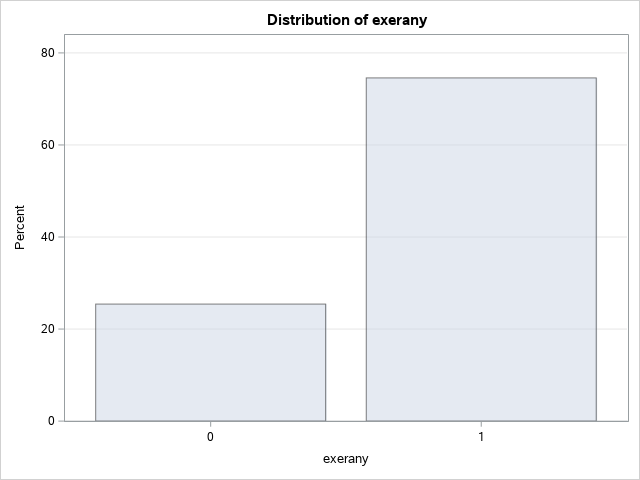
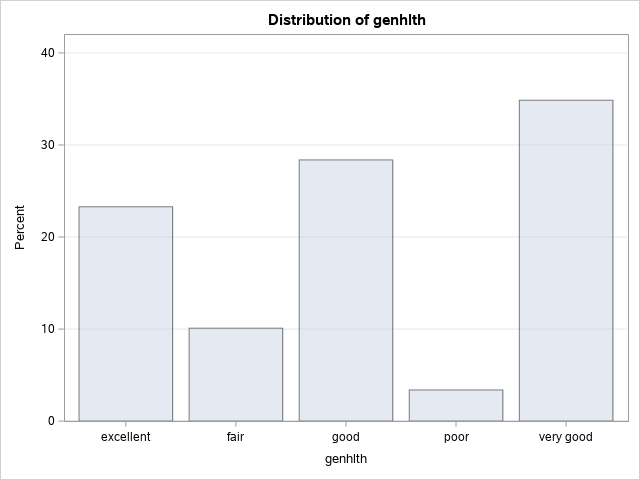

In [7]:
proc freq data=work.cdc;
tables gender / plots=freqplot(scale=percent);
tables exerany / plots=freqplot(scale=percent);
tables genhlth / plots=freqplot(scale=percent);
run;

9569 males are in the sample.<br>
23.29% of sample reports are in excellent health.

In [8]:
proc freq data=work.cdc;
tables gender*smoke100;
run;


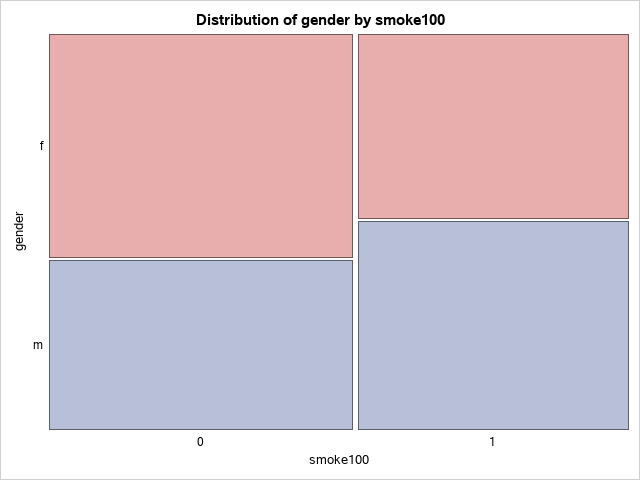

In [9]:
proc freq data=work.cdc;
tables gender*smoke100 / plots=mosaicplot;
run;

The mosaic reveals that males tend to smoke more than females.

## Interlude: How SAS Processes Data

In [10]:
proc print data=work.cdc (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,good,0,1,0,70,175,175,77,m
2,good,0,1,1,64,125,115,33,f
3,good,1,1,1,60,105,105,49,f
4,good,1,1,0,66,132,124,42,f
5,very good,0,1,0,61,150,130,55,f
6,very good,1,1,0,64,114,114,55,f
7,very good,1,1,0,71,194,185,31,m
8,very good,0,1,0,67,170,160,45,m
9,good,0,1,1,65,150,130,27,f
10,good,1,1,0,70,180,170,44,m


In [11]:
proc contents data=work.cdc;
run;

In [12]:
data work.newcdc;
set work.cdc;
if gender="m" and age>30;
run;
proc print data=work.newcdc (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,good,0,1,0,70,175,175,77,m
2,very good,1,1,0,71,194,185,31,m
3,very good,0,1,0,67,170,160,45,m
4,good,1,1,0,70,180,170,44,m
5,excellent,1,1,1,69,186,175,46,m
6,fair,1,1,1,69,168,148,62,m
7,excellent,1,1,1,70,170,170,69,m
8,good,1,1,1,73,185,175,79,m
9,good,0,0,1,67,156,150,47,m
10,fair,0,1,1,71,185,185,76,m


In [13]:
data work.newcdc;
set work.cdc;
wtkilos=weight*0.453592;
wtdiff=sum(weight,-wtdesire);
genhlth=propcase(genhlth);
now=today();
run;
proc print data=work.newcdc (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,wtkilos,wtdiff,now
1,Good,0,1,0,70,175,175,77,m,79.3786,0,21851
2,Good,0,1,1,64,125,115,33,f,56.6990,10,21851
3,Good,1,1,1,60,105,105,49,f,47.6272,0,21851
4,Good,1,1,0,66,132,124,42,f,59.8741,8,21851
5,Very Good,0,1,0,61,150,130,55,f,68.0388,20,21851
6,Very Good,1,1,0,64,114,114,55,f,51.7095,0,21851
7,Very Good,1,1,0,71,194,185,31,m,87.9968,9,21851
8,Very Good,0,1,0,67,170,160,45,m,77.1106,10,21851
9,Good,0,1,1,65,150,130,27,f,68.0388,20,21851
10,Good,1,1,0,70,180,170,44,m,81.6466,10,21851


## Exercise 4

We create a new data set named under23smoke that contains all observations of respondents
under the age of 23 that have smoked 100 cigarettes in their lifetime.

In [14]:
data work.under23smoke;
set work.cdc;
if age<23 and smoke100=1;
run;
proc print data=work.under23smoke (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,excellent,1,0,1,66,185,220,21,m
2,very good,1,0,1,70,160,140,18,f
3,excellent,1,1,1,74,175,200,22,m
4,good,1,1,1,64,190,140,20,f
5,very good,1,1,1,62,92,92,21,f
6,very good,1,0,1,64,125,115,22,f
7,fair,0,1,1,71,185,185,20,m
8,fair,1,1,1,72,185,170,19,m
9,excellent,1,0,1,63,105,100,19,m
10,fair,1,1,1,71,185,150,18,m


## Quantitative Data


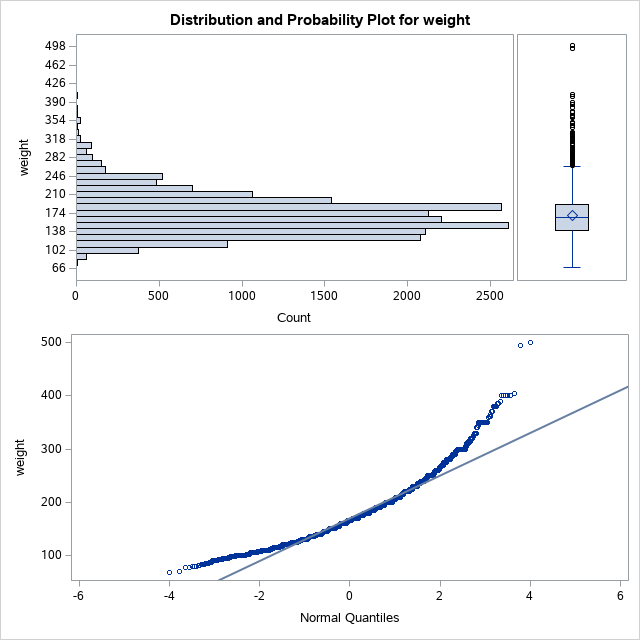

In [15]:
ods graphics;
proc univariate data=work.cdc plots;
var weight;
run;


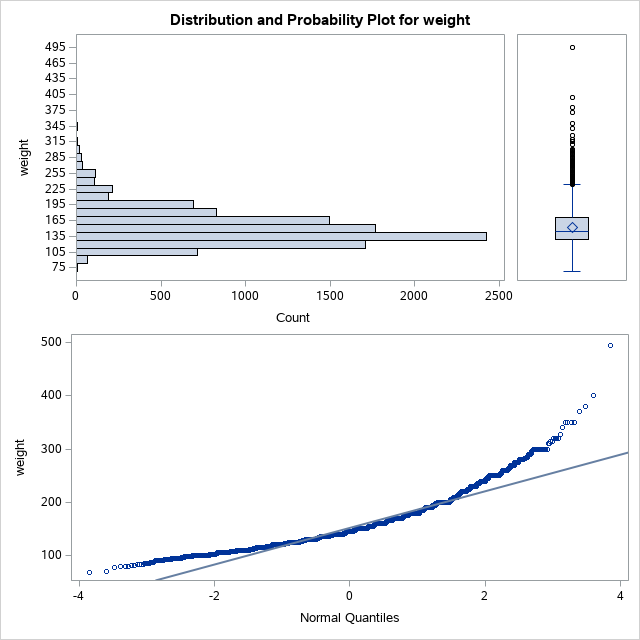
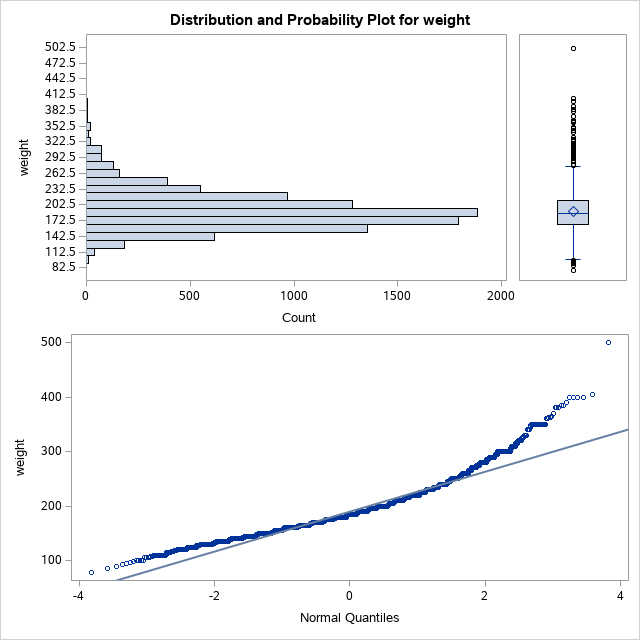

In [16]:
ods graphics;
proc univariate data=work.cdc plots;
class gender;
var Weight;
run;


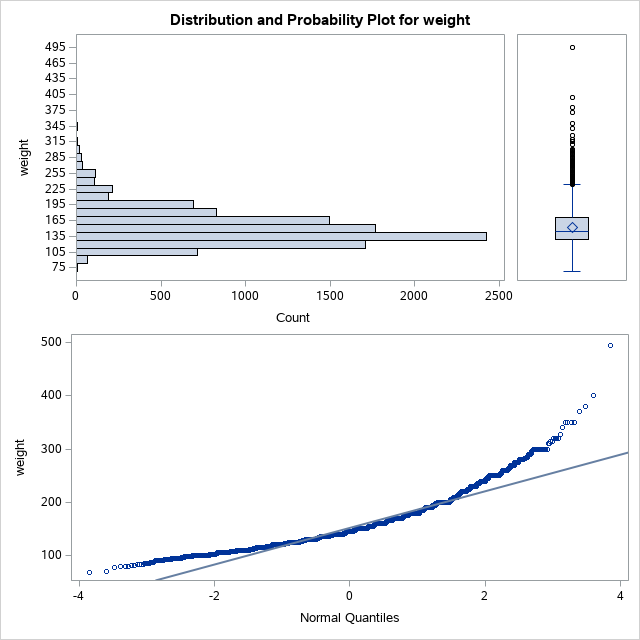
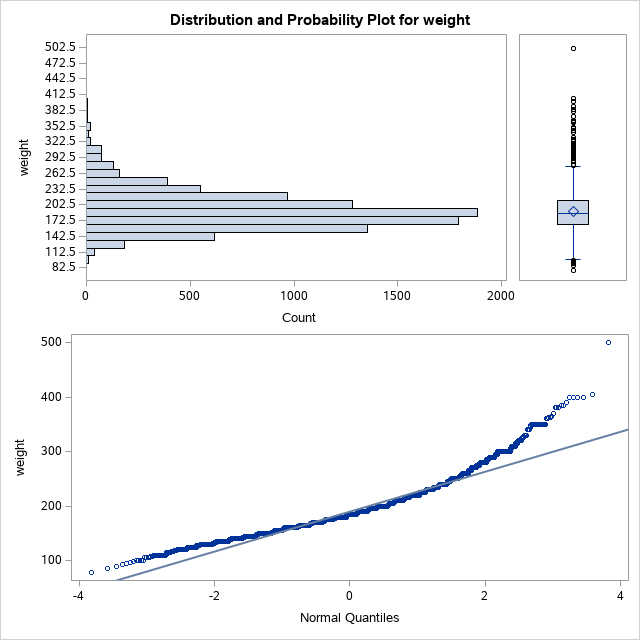
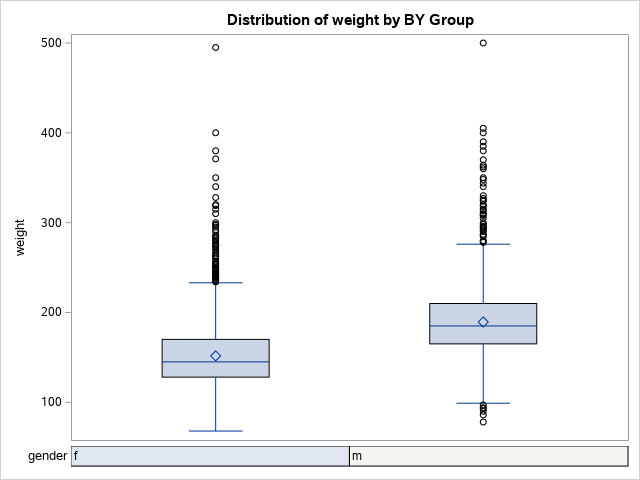

In [17]:
proc sort data=work.cdc;
by gender;
run;
ods graphics;
proc univariate data=work.cdc plots;
by gender;
var Weight;
run;

In [18]:
data work.cdcbmi;
set work.cdc;
bmi=(weight/height**2) * 703;
run;
proc print data=work.cdcbmi (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,bmi
1,good,0,1,1,64,125,115,33,f,21.4539
2,good,1,1,1,60,105,105,49,f,20.5042
3,good,1,1,0,66,132,124,42,f,21.3030
4,very good,0,1,0,61,150,130,55,f,28.3392
5,very good,1,1,0,64,114,114,55,f,19.5659
6,good,0,1,1,65,150,130,27,f,24.9586
7,very good,1,1,0,67,125,120,33,f,19.5756
8,very good,1,1,0,69,200,150,48,f,29.5316
9,good,1,1,1,65,160,140,54,f,26.6225
10,very good,0,0,1,64,105,120,27,f,18.0212



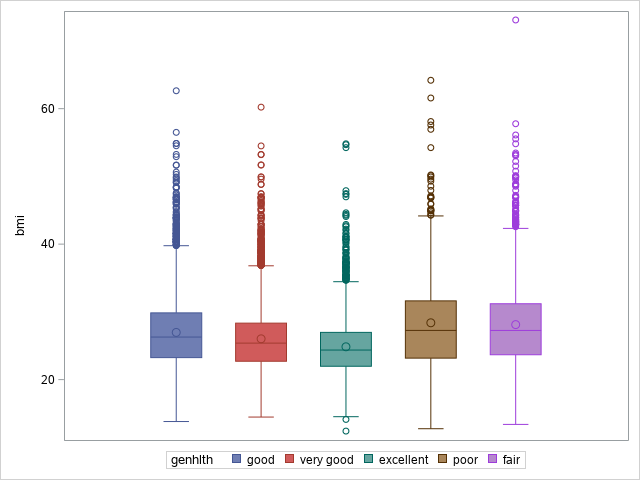

In [19]:
proc sgplot data=work.cdcbmi;
vbox bmi / group=genhlth;
run;

## Exercise 5

The box plots show that people who are in better health have a lower median bmi. <br>
Another variable that could have a relationship to bmi is exerany, which indicates whether the respondent exercised in the past month.


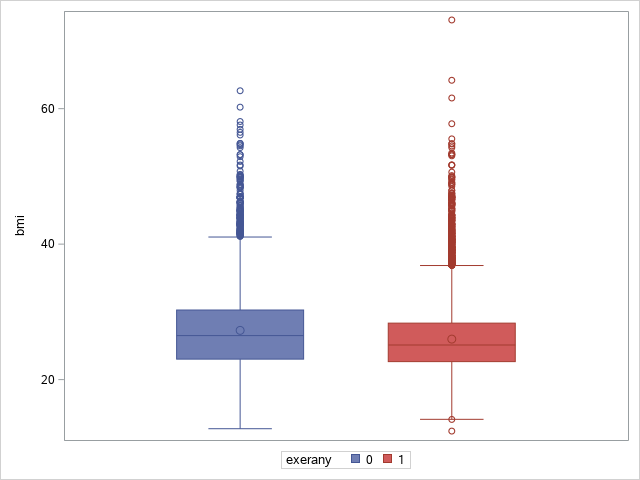

In [20]:
proc sgplot data=work.cdcbmi;
vbox bmi / group=exerany;
run;

We can see that respondents who have exercised in the past month tend to have a lower bmi than the ones that have not exercised in the past month.


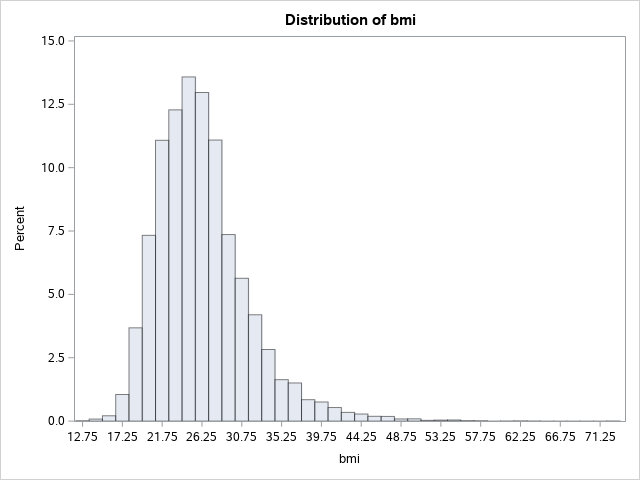

In [21]:
proc univariate data=work.cdcbmi;
var bmi;
histogram bmi;
run;


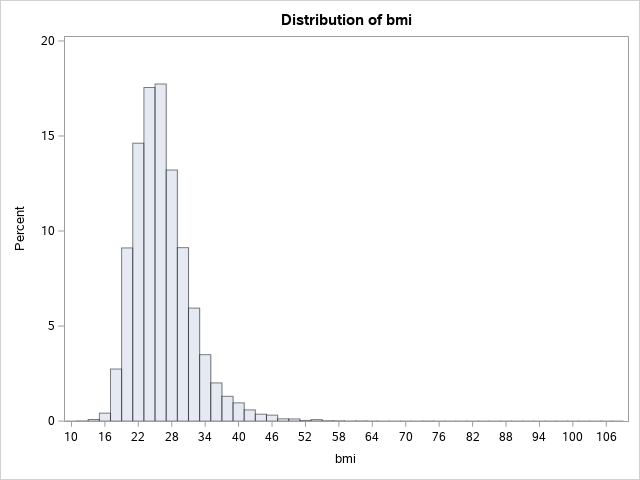

In [22]:
proc univariate data=work.cdcbmi;
var bmi;
histogram bmi / nmidpoints=50;
run;


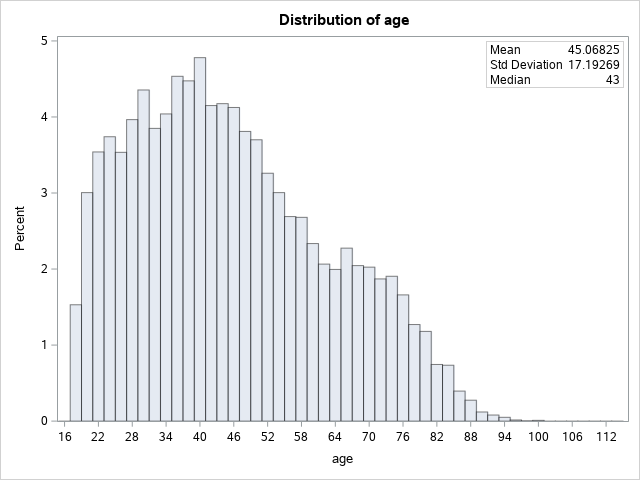

In [23]:
ods graphics;
proc univariate data=work.cdc;
var age;
histogram age / nmidpoints=50;
inset mean std median / position=NE;
run;

## On your own exercises

#### 1. Make a scatter plot of weight versus desired weight. (Hint: Use the SCATTER statement in PROC SGPLOT). Describe the relationship between these two variables.


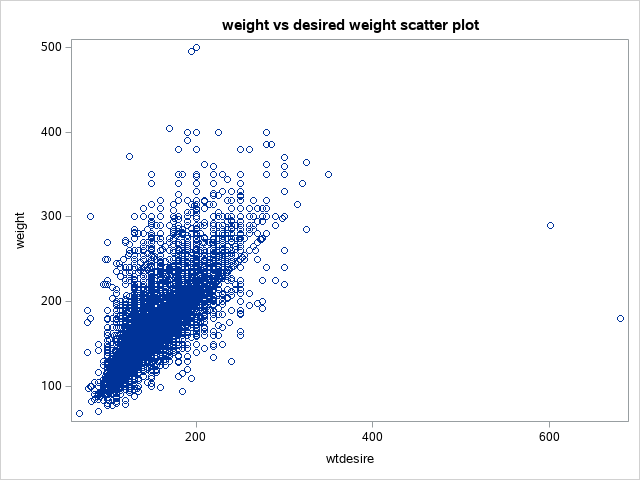

In [24]:
PROC sgscatter  DATA = work.cdc;
   PLOT weight * wtdesire;
   title 'weight vs desired weight scatter plot';
RUN;

#### 2. Let’s consider a new variable: the difference between desired weight (wtdesire) and current weight(weight). Create this new variable by subtracting the two columns in the new data set and assigning them to a new object named wdiff.


In [36]:
data work.newcdc1;
    set work.cdc;
    title;
    wdiff= wtdesire - weight;
run;
proc print data=work.newcdc1 (obs=10);
run;

Obs,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,wdiff
1,good,0,1,1,64,125,115,33,f,-10
2,good,1,1,1,60,105,105,49,f,0
3,good,1,1,0,66,132,124,42,f,-8
4,very good,0,1,0,61,150,130,55,f,-20
5,very good,1,1,0,64,114,114,55,f,0
6,good,0,1,1,65,150,130,27,f,-20
7,very good,1,1,0,67,125,120,33,f,-5
8,very good,1,1,0,69,200,150,48,f,-50
9,good,1,1,1,65,160,140,54,f,-20
10,very good,0,0,1,64,105,120,27,f,15


#### 3. What type of variable is wdiff? If an observation for wdiff is 0, what does this mean about the person’s weight and desired weight. What if wdiff is positive or negative?


wdiff is continuous data, as it is a measurement that can be infinitely specific
- If an observation is 0, then the respondent is satisfied with their current weight.
- If wdiff is negative, than they want to lose weight.
- If it is positive, they want to gain weight.

#### 4. Describe the distribution of wdiff in terms of its center,shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?



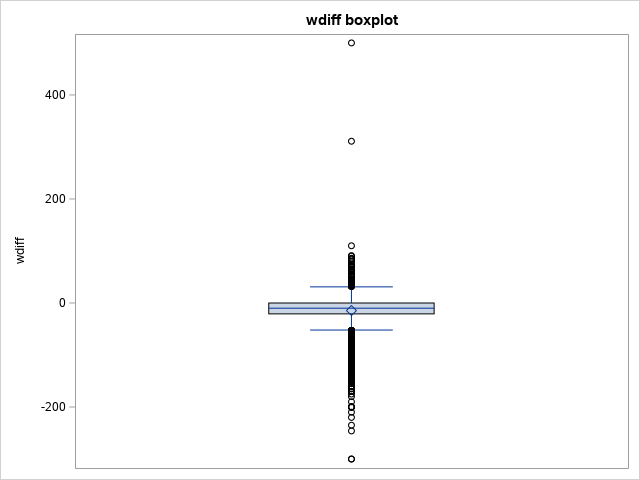
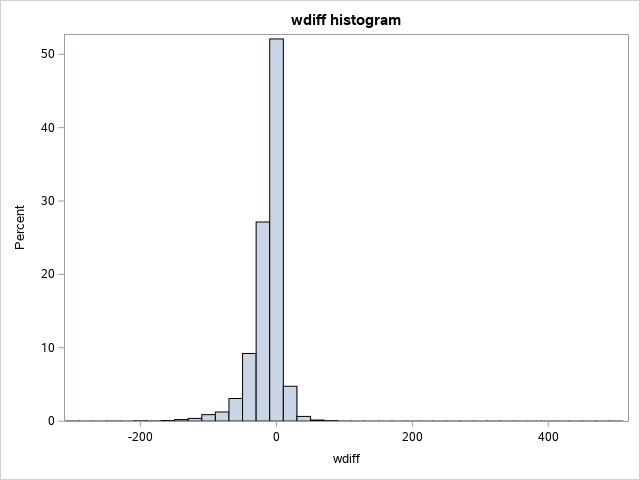

In [35]:
proc sgplot data = work.newcdc1;
    title 'wdiff boxplot';
    vbox wdiff;
run;
proc sgplot data = work.newcdc1;
    title 'wdiff histogram';
    histogram  wdiff;
run;
proc univariate data = work.newcdc1;
    title;
    var wdiff;
run;


- Distribution in terms of the center of wdiff:<br>
wdiff median = -10, mean = -14.5891, so it’s typical for people to want to lose between 10 to 15 pounds.<br><br>
- Distribution in terms of the shape of wdiff:<br>
The Wdiff histogram has a small left skew, because the mean is smaller than the median. So, there are more people who want to lose a lot of weight, and less people who want to gain weight.<br><br>
- Distribution in terms of the spread of wdiff:<br>
The iqr is 21 pounds and the range is 800 pounds. So, we have a small a spread in the distribution with many outliers, mostly of people who want to lose weight.<br><br>

#### 5. Using numerical summaries and a side-by-side box plot, determine whether men tend to view their weight differently than women.


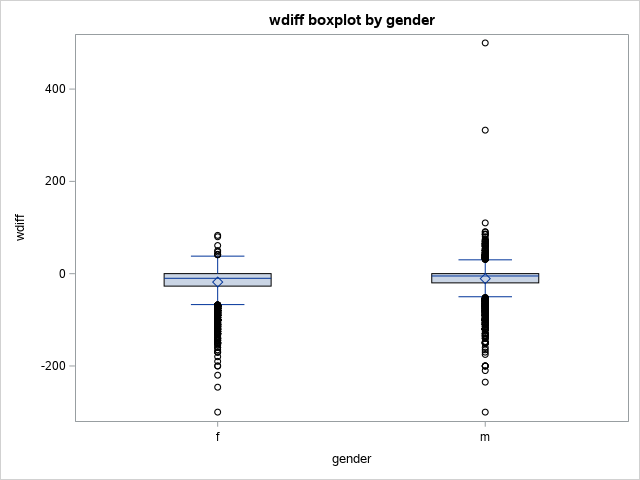

In [34]:
proc sgplot data = work.newcdc1;
 title 'wdiff boxplot by gender';
 vbox wdiff
  / category = gender;
run;
proc univariate data = work.newcdc1;
    title;
    var wdiff;
   by gender;
run;

#### Female (mean = -18.1512) appear to want to lose a few more pounds than males (mean = -10.7061) and more males than females appear to want to gain weight. Also, females have a slightly larger range of how much they want to lose/gain (iqr = 27) than males (iqr = 20). 

#### 6. Mean and standard deviation of weight and the proportion of the weights that is within one standard deviation of the mean.

In [79]:
proc means data=work.newcdc1;
var weight;
output out=have1 mean = m stddev=s n=num;
run;

data _null_;
set have1;
call symputx("mean",m);
call symputx("std",s);
call symputx("n",num);
run;

data work.newcdc2;
set work.newcdc1;
if weight>&mean.-&std. and weight<&mean.+&std.;
run;
proc print data=work.newcdc2 (obs=10);
run;

proc means data = work.newcdc2;
var weight;
run;

proc sql;
select count(*) as old_range from work.newcdc1;
select count(*) as new_range from work.newcdc2;
quit;



#### From the two mean summaries, we calculate the proportion within one standard deviation of the mean: 14152/20000 = 0.7076